<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!rm -r /content/RoadCrack-2

rm: cannot remove '/content/RoadCrack-2': No such file or directory


In [3]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(3)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-3 in voc:: 100%|██████████| 679/679 [00:01<00:00, 402.19it/s]


In [4]:
!pip install opencv-python

In [5]:
!pip install pillow

# Cut Image based on bounding box

In [6]:
!mkdir /content/cropped/
!mkdir /content/cropped/retak
!mkdir /content/cropped/tidak-retak

In [79]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-3/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-3/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-3/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        classifier = value.find(".//name").text
        cropped_img.save(f"/content/cropped/{classifier}/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [8]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

ls: cannot access '/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg': No such file or directory


# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [80]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

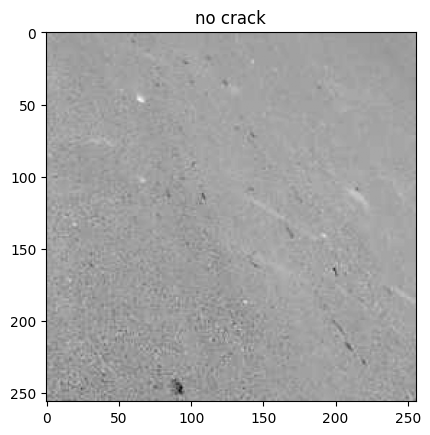

In [81]:
example = "/content/cropped/tidak-retak/cropped_IMG_20251123_160924_3_jpg.rf.bb5b566121c9b45df04b85f27e7ba141.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'no crack')
plt.show()

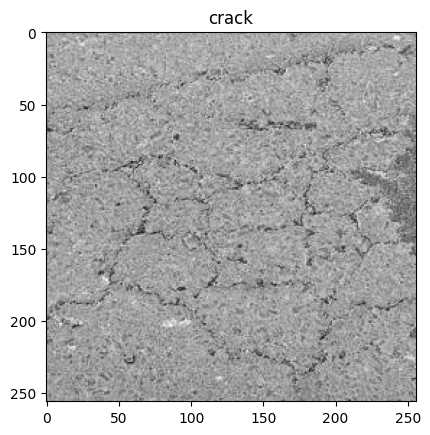

In [82]:
example = "/content/cropped/retak/cropped_IMG_20251106_150643_jpg.rf.c06a0746cde2bb34bbfe60f76420f6b7.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'crack')
plt.show()

# Init GLCM Function

In [83]:
def glcm_process(img, path="/content/cropped/"):
    im_frame = Image.open(f"{path}{img}")
    if im_frame.mode == "RGBA":
        im_frame = im_frame.convert("RGB")
    im_frame = im_frame.resize((64*2, 64*2))
    image = (256 * rgb2gray(np.array(im_frame))).astype(np.uint8)
    image = util.img_as_ubyte(image)
    # GLCM
    distances = [50]
    angles = [0, 45, 90, 135, 180]
    glcm = graycomatrix(
        image,
        distances=distances,
        angles=angles,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation


# Crafting Dataframe

In [84]:
import pandas as pd

df_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])
df_no_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])

In [88]:
df_crack,df_no_crack

(        contrast  dissimiliarity  homogeneity    energy  correlation
 0     178.457232        9.742889     0.112582  0.030216     0.315039
 1     234.699720       11.952123     0.081559  0.028374     0.023853
 2     424.502404       14.320112     0.094511  0.031759     0.114945
 3       0.000000        0.000000     1.000000  1.000000     1.000000
 4     318.770333       13.884916     0.075926  0.022777     0.111191
 ..           ...             ...          ...       ...          ...
 180    69.821915        6.221755     0.162610  0.059483    -0.044293
 181  1025.278646       24.969351     0.040403  0.015499     0.059093
 182   528.514323       16.670773     0.067275  0.025950    -0.036623
 183  2012.314704       33.795272     0.038320  0.013372     0.100553
 184  2119.413562       36.125300     0.027935  0.011170     0.064156
 
 [185 rows x 5 columns],
 Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [])

In [87]:
cropped_dir = os.listdir("/content/cropped/retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_crack = pd.concat([df_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [89]:
cropped_dir = os.listdir("/content/cropped/tidak-retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/tidak-retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_no_crack = pd.concat([df_no_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [91]:
df_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,178.457232,9.742889,0.112582,0.030216,0.315039
1,234.699720,11.952123,0.081559,0.028374,0.023853
2,424.502404,14.320112,0.094511,0.031759,0.114945
3,0.000000,0.000000,1.000000,1.000000,1.000000
4,318.770333,13.884916,0.075926,0.022777,0.111191
...,...,...,...,...,...
180,69.821915,6.221755,0.162610,0.059483,-0.044293
181,1025.278646,24.969351,0.040403,0.015499,0.059093
182,528.514323,16.670773,0.067275,0.025950,-0.036623
183,2012.314704,33.795272,0.038320,0.013372,0.100553


In [92]:
df_no_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,68.754808,6.509014,0.138938,0.051545,0.016910
1,265.988982,12.750801,0.086493,0.028691,0.014434
2,14.252905,2.781550,0.304544,0.090674,0.468854
3,53.563602,5.615885,0.169115,0.054970,0.173364
4,54.520833,5.503205,0.178735,0.060128,0.136180
...,...,...,...,...,...
148,43.997496,5.026542,0.188571,0.069619,0.004752
149,89.328826,7.332632,0.130840,0.040216,0.226866
150,80.204728,6.791066,0.144991,0.042340,0.276859
151,222.359675,11.862881,0.079796,0.030523,-0.134268


Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [93]:
import pandas as pd

df_crack['label'] = 1
df_no_crack['label'] = 0

df = pd.concat([df_crack, df_no_crack], ignore_index=True)
df

,contrast,dissimiliarity,homogeneity,energy,correlation,label
0,178.457232,9.742889,0.112582,0.030216,0.315039,1
1,234.699720,11.952123,0.081559,0.028374,0.023853,1
2,424.502404,14.320112,0.094511,0.031759,0.114945,1
3,0.000000,0.000000,1.000000,1.000000,1.000000,1
4,318.770333,13.884916,0.075926,0.022777,0.111191,1
...,...,...,...,...,...,...
333,43.997496,5.026542,0.188571,0.069619,0.004752,0
334,89.328826,7.332632,0.130840,0.040216,0.226866,0
335,80.204728,6.791066,0.144991,0.042340,0.276859,0
336,222.359675,11.862881,0.079796,0.030523,-0.134268,0


In [94]:
X = df[['contrast','dissimiliarity','homogeneity','energy','correlation']]
y = df['label']

X,y

(       contrast  dissimiliarity  homogeneity    energy  correlation
 0    178.457232        9.742889     0.112582  0.030216     0.315039
 1    234.699720       11.952123     0.081559  0.028374     0.023853
 2    424.502404       14.320112     0.094511  0.031759     0.114945
 3      0.000000        0.000000     1.000000  1.000000     1.000000
 4    318.770333       13.884916     0.075926  0.022777     0.111191
 ..          ...             ...          ...       ...          ...
 333   43.997496        5.026542     0.188571  0.069619     0.004752
 334   89.328826        7.332632     0.130840  0.040216     0.226866
 335   80.204728        6.791066     0.144991  0.042340     0.276859
 336  222.359675       11.862881     0.079796  0.030523    -0.134268
 337  140.765825        8.898838     0.115058  0.037838     0.110137
 
 [338 rows x 5 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 333    0
 334    0
 335    0
 336    0
 337    0
 Name: label, Length: 338, dtype: i

In [21]:
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

# X_scaled = decimal_scaling(X)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    # Dense(16, activation='relu'),
    Dense(30, activation='relu'), # Dense layer pertama dengan 30 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer kedua dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer ketiga dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(1024, activation='relu'), # Dense layer keempat dengan 1024 neuron dan fungsi aktivasi ReLU
    Dropout(0.25), # Lapisan dropout untuk mencegah overfitting, dengan 25% neuron
    Dense(1024, activation='relu'), # Dense layer nkelima dengan 1024 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer keenam dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer ketujuh dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()
# {'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371,999 (9.05 MB)

 Trainable params: 2,371,999 (9.05 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2,
)
# {'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4950 - loss: 2.2883 - val_accuracy: 0.5741 - val_loss: 0.6603
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6237 - loss: 0.5825 - val_accuracy: 0.6111 - val_loss: 0.5610
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7100 - loss: 0.5325 - val_accuracy: 0.8148 - val_loss: 0.5198
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7194 - loss: 0.8418 - val_accuracy: 0.7037 - val_loss: 0.4917
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7529 - loss: 0.4972 - val_accuracy: 0.8519 - val_loss: 0.3609
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8086 - loss: 0.5588 - val_accuracy: 0.7407 - val_loss: 0.4808
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8111 - loss: 0.4712 - val_accuracy: 0.8519 - val_loss: 0.5355
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7129 - loss: 0.5868 - val_accuracy: 0.8519 - v

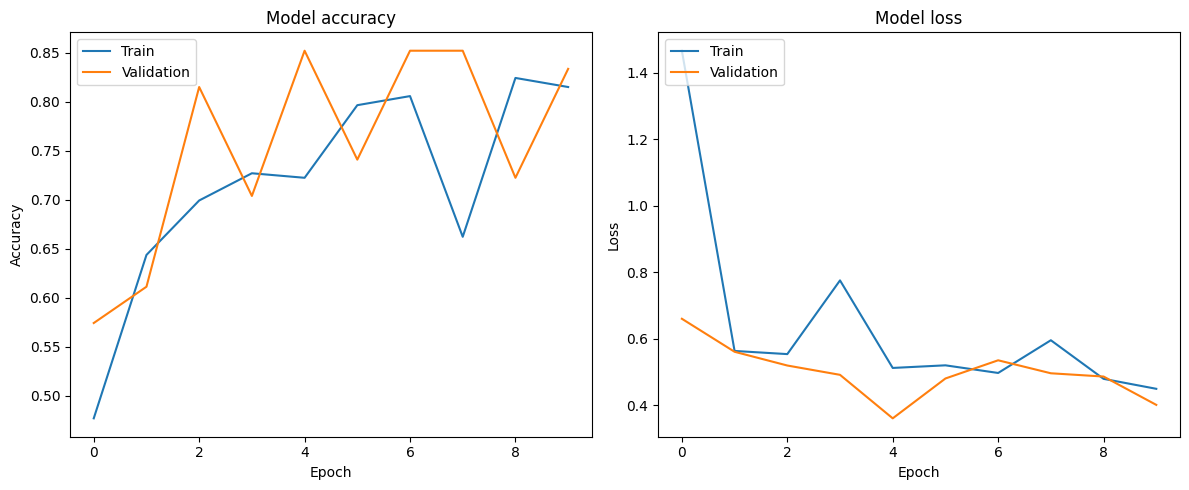

In [63]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [66]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7847 - loss: 0.4602
Accuracy: 0.7647058963775635


In [ ]:
{'num_layers': 2, 'units': 32, 'dropout': 0.0, 'optimizer': 'rmsprop', 'lr': 0.01, 'batch_size': 16, 'epochs': 10}

# Testing

Saving POSTER STOKASTIK_05_RA.png to POSTER STOKASTIK_05_RA.png


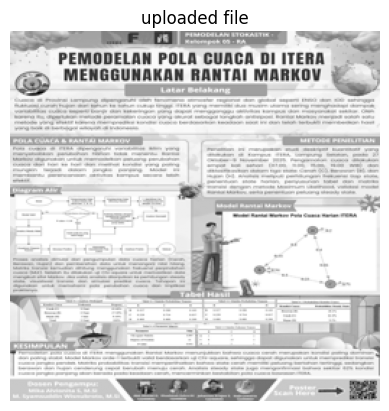

In [73]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image
from skimage.color import rgb2gray
from skimage import util
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

#cv rgb ke bgr
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# preprocess
im_frame = Image.fromarray(img_rgb).resize((64*4, 64*4))
image = (255 * rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)
plt.imshow(imaged, cmap='gray')
plt.title('uploaded file')
plt.axis('off')
plt.show()

In [74]:
sample = glcm_process(filename,path='/content/')
sample = np.array(sample).reshape(1,5)
# sample
sample

array([[ 1.27470157e+04,  7.92028245e+01,  2.35380948e-02,
         2.08444058e-02, -7.59309907e-02]])

In [75]:
import numpy as np

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Prediksi crack:", pred[0][0])

if pred[0][0] < 0.5:
  print("tidak retak")
else:
  print("retak nih 😂")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediksi crack: 1.0
retak nih 😂


X does not have valid feature names, but StandardScaler was fitted with feature names


# Random Search

# Compile Model

In [34]:
import joblib
joblib.dump(model,"glcmv1.pkl")

['glcmv1.pkl']

In [ ]:
modeljoblib = joblib.load('glcmv1.pkl')

# Use the loaded model to make predictions
print("After save:",modeljoblib.predict(X_test))

In [41]:
import numpy as np

Vsample_scaled = scaler.transform(sample)
Vpred = modeljoblib.predict(Vsample_scaled)
print("Prediksi crack:", pred[0][0])

if Vpred[0][0] < 0.5:
  print("tidak retak")
else:
  print("retak nih 😂")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

X does not have valid feature names, but StandardScaler was fitted with feature names


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Prediksi crack: 1.0
retak nih 😂
